[Затыкать пропуски нейронкой](https://datawig.readthedocs.io/en/latest/)

In [12]:
import pandas as pd
import numpy as np
import csv
import swifter
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps

In [ ]:
# tst = ps.sqldf(query, locals())

In [9]:
lastfm = pd.read_csv('/Users/i.pile/Downloads/lastfm2.csv', 
                     quotechar='|', 
                     quoting=csv.QUOTE_ALL, 
                     delimiter=' ')

In [11]:
lastfm.head(2)

album href album tag  album page  \
0  https://www.last.fm/music/Linkin+Park/Minutes+...      rock           1   
1  https://www.last.fm/music/Linkin+Park/Minutes+...      rock           1   

   album num           album name album artist  \
0          1  Minutes to Midnight  Linkin Park   
1          1  Minutes to Midnight  Linkin Park   

                                    album cover href  album listeners  \
0  https://lastfm.freetls.fastly.net/i/u/300x300/...          1910153   
1  https://lastfm.freetls.fastly.net/i/u/300x300/...          1910153   

   album scrobbles  album tracks_total album length album release date  \
0         52463554                  12          NaN        11 May 2007   
1         52463554                  12          NaN        11 May 2007   

   track pos track name track duration  track listeners  track scrobbles  \
0          1       Wake            NaN           392738          2282570   
1          2   Given Up           3:16           712634          6165064   

                                          track href  
0  https://www.last.fm/music/Linkin+Park/Minutes+...  
1  https://www.last.fm/music/Linkin+Park/Minutes+...

In [39]:
%%time
lastfm['datetime_pandas'] = pd.to_datetime(lastfm['album release date'])

CPU times: user 464 ms, sys: 14.7 ms, total: 478 ms
Wall time: 488 ms


In [15]:
%%time
lastfm['datetime_pandas'] = lastfm['album release date'].apply(pd.to_datetime)

CPU times: user 26.2 s, sys: 613 ms, total: 26.9 s
Wall time: 27.5 s


In [17]:
%%time
lastfm['datetime_pandas'] = lastfm['album release date'].swifter.apply(pd.to_datetime)

CPU times: user 411 ms, sys: 9.52 ms, total: 421 ms
Wall time: 431 ms


In [40]:
lastfm['datetime_pandas'].dtype

dtype('<M8[ns]')

# Сколько альбомов выходило за каждый конкретный год (из датасета)
## Ответ - график Оx - Год, Oy - сколько было альбомов

In [33]:
lastfm[lastfm['album release date'].isna()]

(1089, 19)

In [36]:
lastfm.columns

Index(['album href', 'album tag', 'album page', 'album num', 'album name',
       'album artist', 'album cover href', 'album listeners',
       'album scrobbles', 'album tracks_total', 'album length',
       'album release date', 'track pos', 'track name', 'track duration',
       'track listeners', 'track scrobbles', 'track href', 'datetime_pandas'],
      dtype='object')

In [48]:
lastfm['album_year'] = lastfm['album release date'].apply(str).apply(lambda x: x[-4:])

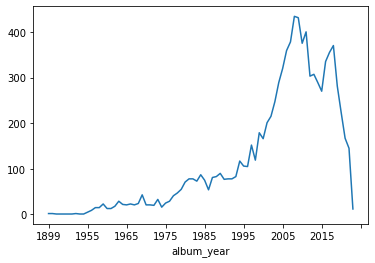

In [50]:
lastfm[~lastfm['album release date'].isna()]\
.groupby('album_year')\
['album href']\
.nunique().plot()

# Сколько в среднем композиций в альбоме

In [61]:
lastfm['track duration'] = lastfm['track duration'].fillna('0')

In [67]:
def get_sec(x):
    x = x.split(':')
    try:
        return int(x[0])*60 + int(x[1])
    except:
        return 0

In [66]:
get_sec('0:40')

40

In [68]:
lastfm['duration'] = lastfm['track duration'].swifter.apply(get_sec)

Pandas Apply:   0%|          | 0/142335 [00:00<?, ?it/s]

In [69]:
lastfm[lastfm.duration != 0].shape

(124164, 21)

# У какого исполнителя в датасете наибольшее число альбомов

In [81]:
lastfm.groupby('album href').size().mean()

15.122715682107946

In [88]:
lastfm.groupby('album href').size().mean()

lastfm.groupby('album artist')['album href']\
.nunique()\
.reset_index()\
.sort_values(by = 'album href').tail(5)

album artist  album href
3533                     Queen          21
2497              Lana Del Rey          23
2199               Johnny Cash          23
568   Bob Marley & The Wailers          26
4799           Various Artists          36

In [ ]:
lastfm.groupby('album artist')['album href'].nunique().reset_index().top

# Сколько в среднем длина композиции в зависимости от "жанра"

In [94]:
lastfm[lastfm['duration'] != 0]\
.groupby('album tag')['duration']\
.agg(['mean', 'median'])\
.sort_values(by = 'mean', ascending = False)

mean  median
album tag                           
classical         253.449623   214.0
metal             252.652731   240.0
jazz              252.054495   224.0
modern classical  248.974906   214.0
80s               246.917192   238.0
electronic        246.106606   235.0
neoclassical      245.282407   229.0
rock              235.646718   224.0
reggae            232.211008   225.0
acoustic          230.655274   221.0
dance             230.438055   219.0
blues             229.679252   208.0
composer          228.712005   188.0
british           226.450714   218.0
post-punk         225.091249   219.0
alternative       223.646339   219.0
russian           221.641107   216.0
rnb               218.772737   220.0
indie             211.618060   210.0
rap               211.509561   216.0
country           209.550276   207.0
hip-hop           208.428520   212.0
punk              173.944943   169.0
hardcore          167.189360   162.0

# Плохое поле из Reverb

In [119]:
reverb = pd.read_csv('/Users/i.pile/reverb_aggregated.csv')

In [101]:
import json

In [108]:
eval('10.5436272')

10.5436272

In [111]:
reverb['param_dict'] = reverb['param_dict'].swifter.apply(eval)

Pandas Apply:   0%|          | 0/31920 [00:00<?, ?it/s]

# Сколько уникальных объявлений?

In [120]:
reverb = reverb.drop('listing_id', axis = 1)

In [122]:
reverb = reverb.drop_duplicates()

In [123]:
reverb['param_dict'] = reverb['param_dict'].swifter.apply(eval)

Pandas Apply:   0%|          | 0/19516 [00:00<?, ?it/s]

In [137]:

(np.array([[1,2],[3,4]])).flatten()

array([1, 2, 3, 4])

In [149]:
from matplotlib.cbook import flatten

In [152]:
from matplotlib.cbook import flatten
len(set(flatten(reverb.param_dict.apply(lambda x: x.keys()))))

33

In [154]:
fields_list = set(flatten(reverb.param_dict.apply(lambda x: x.keys())))

# Добавить эти 33 поля в датафрейм, если пусто, писать ''

In [155]:
from tqdm import tqdm

In [156]:
for el in tqdm(fields_list):
    reverb[el] = reverb['param_dict'].apply(lambda x: x.get(el, ''))

100%|██████████| 33/33 [00:00<00:00, 118.46it/s]


In [160]:
reverb = reverb.reset_index(drop = True)

# Видна ли зависимость цены и длины описания (какая-то)

In [170]:
float(reverb.loc[0].price[1:].replace(',',''))

1131.92

In [176]:
reverb['price_num'] = reverb['price'].apply(lambda x: float(x[1:].replace(',','')))

In [178]:
reverb['text_len_sym'] = reverb['text'].apply(len)

In [184]:
import re
reverb['text_len_words'] = reverb['text'].apply(lambda x: len(re.findall(r'\w+', x)))

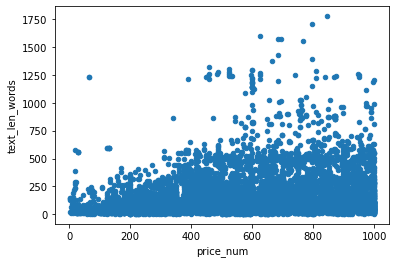

In [186]:
reverb[['price_num', 'text_len_words']][reverb.price_num <= 1000]\
.plot(kind = 'scatter', x= 'price_num',y = 'text_len_words')

In [187]:
reverb['price_group'] = reverb['price_num'].apply(lambda x: (x//100)*100)

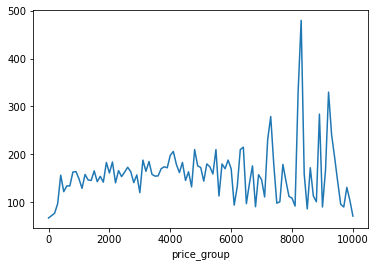

In [190]:
reverb[reverb.price_num <= 10000].groupby('price_group')['text_len_words'].median().plot()